## Heart Disease UCI

Goal:
    The process of predicting whether people will have heart disease by looking at some physical characteristics and blood values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heart.csv")

# EDA

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Analysis

<AxesSubplot:>

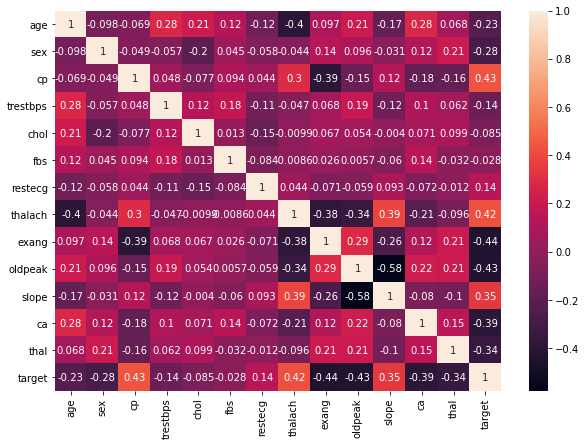

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)


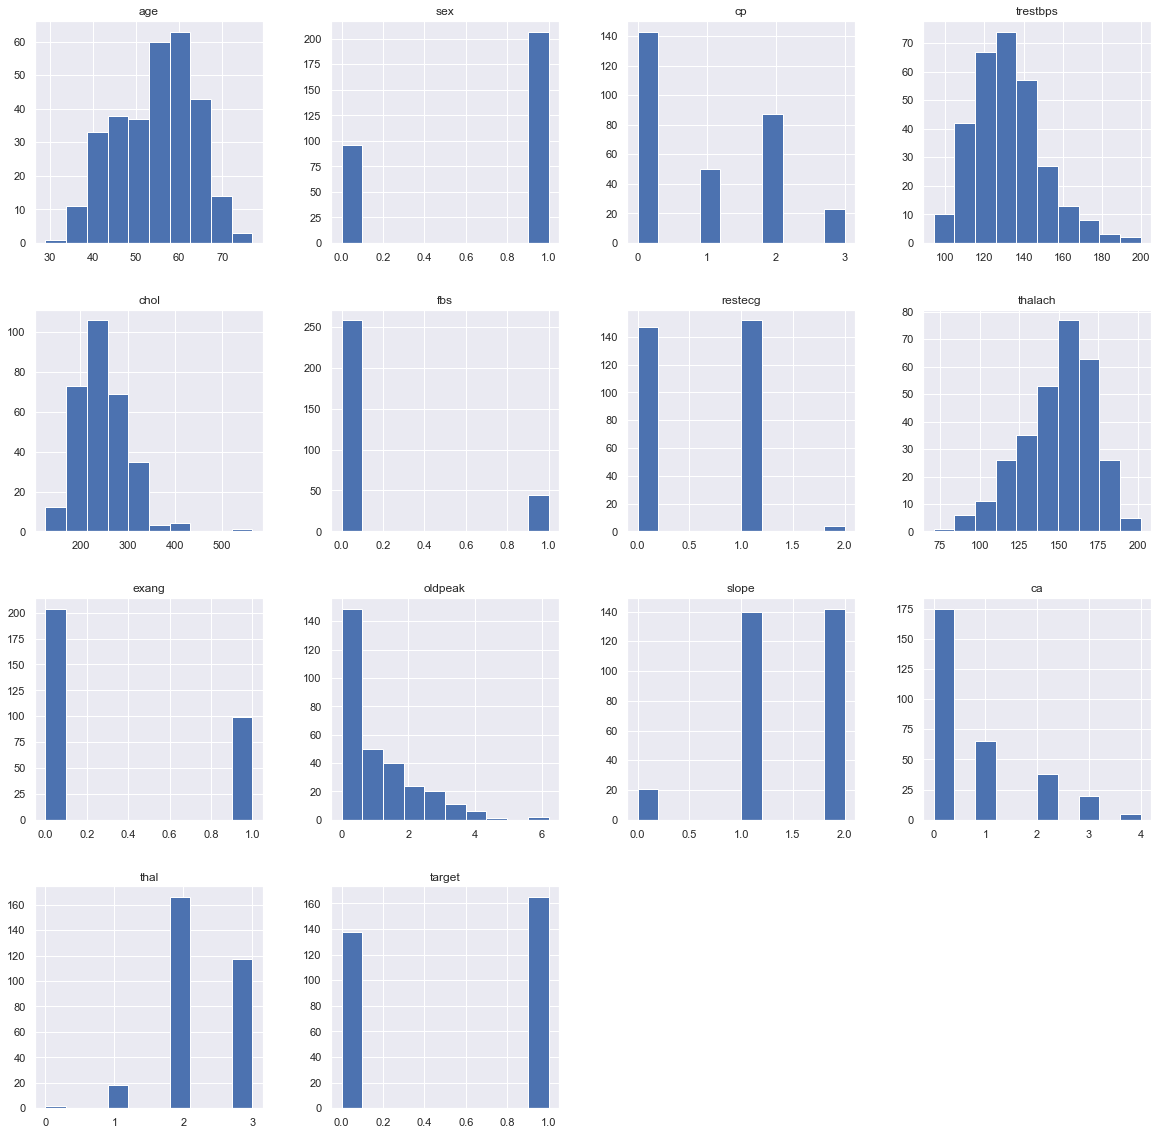

In [8]:
sns.set()
p = df.hist(figsize = (20,20))

<AxesSubplot:xlabel='target', ylabel='count'>

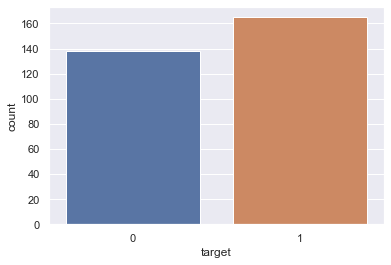

In [9]:
sns.countplot(df.target)

# MODEL

In [10]:
#pip install xgboost

In [11]:
def classification_funct(dataset,column_to_be_studied):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    from sklearn.model_selection import train_test_split
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
    x=pd.get_dummies(x,drop_first=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)

        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
      
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('f1_score',ascending=False)

In [12]:
classification_funct(df,"target")

[23:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,f1_score,recall_score,precision_score,accuracy_score
LogisticRegression,0.892308,0.90625,0.878788,0.885246
BernoulliNB,0.875000,0.87500,0.875000,0.868852
GaussianNB,0.870968,0.84375,0.900000,0.868852
RandomForestClassifier,0.825397,0.81250,0.838710,0.819672
XGBClassifier,0.819672,0.78125,0.862069,0.819672
DecisionTreeClassifier,0.807018,0.71875,0.920000,0.819672
SVC,0.756757,0.87500,0.666667,0.704918
KNeighborsClassifier,0.716418,0.75000,0.685714,0.688525


## Deep Learning

In [13]:
#pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Attempting uninstall: h5py
    Found existing installation

In [14]:
#pip install keras

Note: you may need to restart the kernel to use updated packages.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model=Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [20]:
x,y=df.drop("target",axis=1),df[["target"]]    
x=pd.get_dummies(x,drop_first=True)

In [21]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
31/31 [==============================] - 1s 1ms/step - loss: 31.3028 - accuracy: 0.4521
Epoch 2/150
31/31 [==============================] - 0s 754us/step - loss: 4.8053 - accuracy: 0.4917
Epoch 3/150
31/31 [==============================] - 0s 785us/step - loss: 3.3803 - accuracy: 0.4818
Epoch 4/150
31/31 [==============================] - 0s 854us/step - loss: 2.9842 - accuracy: 0.4950
Epoch 5/150
31/31 [==============================] - 0s 827us/step - loss: 2.6137 - accuracy: 0.5083
Epoch 6/150
31/31 [==============================] - 0s 826us/step - loss: 1.5556 - accuracy: 0.5413
Epoch 7/150
31/31 [==============================] - 0s 882us/step - loss: 1.0043 - accuracy: 0.5875
Epoch 8/150
31/31 [==============================] - 0s 843us/step - loss: 0.7715 - accuracy: 0.6667
Epoch 9/150
31/31 [==============================] - 0s 757us/step - loss: 0.7173 - accuracy: 0.6964
Epoch 10/150
31/31 [==============================] - 0s 878us/step - loss: 0.7029 - accurac

31/31 [==============================] - 0s 752us/step - loss: 0.4097 - accuracy: 0.8317
Epoch 82/150
31/31 [==============================] - 0s 822us/step - loss: 0.3960 - accuracy: 0.8152
Epoch 83/150
31/31 [==============================] - 0s 720us/step - loss: 0.4399 - accuracy: 0.8119
Epoch 84/150
31/31 [==============================] - 0s 768us/step - loss: 0.3946 - accuracy: 0.8053
Epoch 85/150
31/31 [==============================] - 0s 656us/step - loss: 0.4359 - accuracy: 0.8317
Epoch 86/150
31/31 [==============================] - 0s 632us/step - loss: 0.3990 - accuracy: 0.8086
Epoch 87/150
31/31 [==============================] - 0s 751us/step - loss: 0.4162 - accuracy: 0.8086
Epoch 88/150
31/31 [==============================] - 0s 709us/step - loss: 0.4655 - accuracy: 0.7756
Epoch 89/150
31/31 [==============================] - 0s 629us/step - loss: 0.4002 - accuracy: 0.8350
Epoch 90/150
31/31 [==============================] - 0s 669us/step - loss: 0.3894 - accuracy: 

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [23]:
scores=model.evaluate(x,y)

10/10 [==============================] - 1s 932us/step - loss: 0.5121 - accuracy: 0.7855


In [24]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 78.55%


In [30]:
history=model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
25/25 - 0s - loss: 0.3053 - accuracy: 0.8760 - val_loss: 0.6300 - val_accuracy: 0.6885
Epoch 2/200
25/25 - 0s - loss: 0.3443 - accuracy: 0.8636 - val_loss: 1.5909 - val_accuracy: 0.4098
Epoch 3/200
25/25 - 0s - loss: 0.3236 - accuracy: 0.8678 - val_loss: 0.7604 - val_accuracy: 0.6230
Epoch 4/200
25/25 - 0s - loss: 0.3076 - accuracy: 0.8760 - val_loss: 0.9618 - val_accuracy: 0.5574
Epoch 5/200
25/25 - 0s - loss: 0.3371 - accuracy: 0.8636 - val_loss: 1.7231 - val_accuracy: 0.4098
Epoch 6/200
25/25 - 0s - loss: 0.3367 - accuracy: 0.8595 - val_loss: 0.6817 - val_accuracy: 0.6721
Epoch 7/200
25/25 - 0s - loss: 0.3484 - accuracy: 0.8636 - val_loss: 0.6228 - val_accuracy: 0.6885
Epoch 8/200
25/25 - 0s - loss: 0.3025 - accuracy: 0.8884 - val_loss: 1.1949 - val_accuracy: 0.4754
Epoch 9/200
25/25 - 0s - loss: 0.3116 - accuracy: 0.8843 - val_loss: 0.8038 - val_accuracy: 0.6066
Epoch 10/200
25/25 - 0s - loss: 0.3014 - accuracy: 0.8926 - val_loss: 0.5541 - val_accuracy: 0.7213
Epoch 11/

Epoch 84/200
25/25 - 0s - loss: 0.4325 - accuracy: 0.8017 - val_loss: 2.5552 - val_accuracy: 0.2459
Epoch 85/200
25/25 - 0s - loss: 0.3592 - accuracy: 0.8678 - val_loss: 0.4974 - val_accuracy: 0.7377
Epoch 86/200
25/25 - 0s - loss: 0.3413 - accuracy: 0.8595 - val_loss: 1.0041 - val_accuracy: 0.5410
Epoch 87/200
25/25 - 0s - loss: 0.3151 - accuracy: 0.8678 - val_loss: 1.6102 - val_accuracy: 0.4098
Epoch 88/200
25/25 - 0s - loss: 0.3251 - accuracy: 0.8678 - val_loss: 0.7400 - val_accuracy: 0.6230
Epoch 89/200
25/25 - 0s - loss: 0.3394 - accuracy: 0.8843 - val_loss: 0.7027 - val_accuracy: 0.6230
Epoch 90/200
25/25 - 0s - loss: 0.3207 - accuracy: 0.8802 - val_loss: 0.5773 - val_accuracy: 0.6885
Epoch 91/200
25/25 - 0s - loss: 0.3263 - accuracy: 0.8636 - val_loss: 1.0925 - val_accuracy: 0.5082
Epoch 92/200
25/25 - 0s - loss: 0.3493 - accuracy: 0.8678 - val_loss: 0.4322 - val_accuracy: 0.7377
Epoch 93/200
25/25 - 0s - loss: 0.2971 - accuracy: 0.8636 - val_loss: 0.6178 - val_accuracy: 0.6885


Epoch 166/200
25/25 - 0s - loss: 0.4132 - accuracy: 0.8223 - val_loss: 0.9369 - val_accuracy: 0.5410
Epoch 167/200
25/25 - 0s - loss: 0.3473 - accuracy: 0.8554 - val_loss: 0.3841 - val_accuracy: 0.8033
Epoch 168/200
25/25 - 0s - loss: 0.4334 - accuracy: 0.8223 - val_loss: 0.9312 - val_accuracy: 0.5574
Epoch 169/200
25/25 - 0s - loss: 0.3177 - accuracy: 0.8843 - val_loss: 0.8031 - val_accuracy: 0.6066
Epoch 170/200
25/25 - 0s - loss: 0.3074 - accuracy: 0.8760 - val_loss: 1.0658 - val_accuracy: 0.5410
Epoch 171/200
25/25 - 0s - loss: 0.3194 - accuracy: 0.8760 - val_loss: 1.0015 - val_accuracy: 0.5410
Epoch 172/200
25/25 - 0s - loss: 0.3085 - accuracy: 0.8884 - val_loss: 0.7937 - val_accuracy: 0.6066
Epoch 173/200
25/25 - 0s - loss: 0.3597 - accuracy: 0.8802 - val_loss: 0.4871 - val_accuracy: 0.7213
Epoch 174/200
25/25 - 0s - loss: 0.4608 - accuracy: 0.8182 - val_loss: 1.9971 - val_accuracy: 0.3607
Epoch 175/200
25/25 - 0s - loss: 0.3972 - accuracy: 0.8678 - val_loss: 0.8827 - val_accurac

In [31]:
scores=model.evaluate(x,y)

10/10 [==============================] - 0s 998us/step - loss: 0.3722 - accuracy: 0.8416


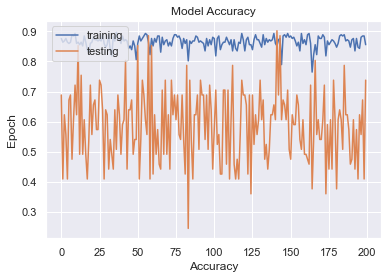

In [32]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

<function matplotlib.pyplot.show(close=None, block=None)>

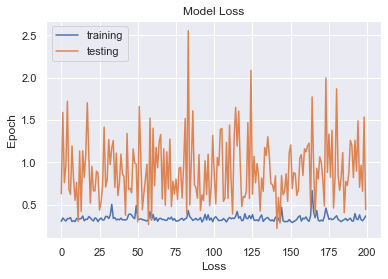

In [33]:
fig1=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

plt.show